# Hierarchical Clustering

The goal of clustering is to partition a data set into subgroups---that is, clusters---based on feature variables, where observations within each cluster are similar to each other and different from those in other clusters.
$k$-means clustering uses distance of observations from centroids to determine similarity/dissimilarity. Also, in $k$-means clustering the number of clusters ($k$) must be pre-specified.

On the other hand, hierarchical clustering relies on distances of observations from each other to determine which observations are similar/dissimilar. Also, with hierarchical clustering, we do not need to specify in advance how many clusters we want. Rather, hierarchical clustering produces a tree-like "map" of the data, called a *dendrogram*, that allows us to view all possible numbers of clusters. Now we will see how "bottom up" or *agglomerative hierarchical clustering* works.

The algorithm to construct a hierarchical clustering dendrogram starts out at the bottom of the dendrogram tree, with each of the $n$ observations treated as its own cluster. Then the two clusters that are most similar to each other are  "fused" so that there now are $n-1$ clusters. Next the two clusters that are most similar to each other are fused again, so that there now are $n-2$ clusters. And so on. The algorithm proceeds in this fashion until all of the observations belong to one single cluster, and then the dendrogram can be plotted. To obtain $k$ clusters, we "cut" the dendrogram at some height.

## A Simple Example

Let's see how this works with a simple example. Suppose we have just the following 5 observations with two features. Points A and B are closest, so start by merging them into a cluster. (Note that in these plots the ovals are just for illustration; their size is meaningless.)

![](https://github.com/kevindavisross/data301/blob/main/images/cluster1.PNG?raw=1)

Source: Dennis Sun



Now what? Should we merge D and E into a cluster? Or should we merge C into the cluster containing A and B? The answer depends on how we measure distance between a cluster and a point. More generally, how do we measure distance between two clusters? The measure of distance between clusters is called the *linkage*, and there are several choices, including:

- single linkage
- complete linkage
- average linkage

![](https://github.com/kevindavisross/data301/blob/main/images/cluster2.PNG?raw=1)
![](https://github.com/kevindavisross/data301/blob/main/images/cluster3.PNG?raw=1)

Source: Dennis Sun

If we continue using single linkage, the algorithm proceeds in these steps

- Fuse A and B
- Fuse C with AB. The single linkage between C and the cluster AB is the distance between B and C.
- Fuse D with E
- Fuse ABC and DE. The single linkage between clusters ABC and DE is the distance between A and D.

![](https://github.com/kevindavisross/data301/blob/main/images/cluster4.PNG?raw=1)

Source: Dennis Sun


The result can be depicted in the following dendrogram. The vertical scale of the dendrogram represents the similarity measured by the linkage. For example, the *height* of the horizontal segment which fuses ABC and DE in the dendrogram is the single linkage between clusters ABC and DE, that is, the distance between points A and D represented by the blue line above.

![](https://github.com/kevindavisross/data301/blob/main/images/cluster5.PNG?raw=1)

Source: Dennis Sun

To get $k$ clusters, we "cut" the dendrogram at some height. Cutting the dendrogram at the height along the dashed line below would result in two clusters, ABC and DE.

![](https://github.com/kevindavisross/data301/blob/main/images/cluster7.PNG?raw=1)

Source: Dennis Sun

If we use complete linkage instead, the algorithm proceeds in these steps

- Fuse A and B
- Fuse D with E
- Fuse C with AB. The complete linkage between C and the cluster AB is the distance between A and C.
- Fuse ABC and DE. The complete linkage between clusters ABC and DE is the distance between C and E.

![](https://github.com/kevindavisross/data301/blob/main/images/cluster6.PNG?raw=1)

Source: Dennis Sun

In this case, the dendrograms turn out to be fairly similar, but the vertical scale would represent distances determined by complete rather than single linkage.

In general, the dendrogram and the resulting clusters can be highly sensitive to the choice of linkage; we'll see an example below.

## Clustering in Practice

Let's see how hierarchical clustering works in practice on the same iris data that we used to illustrate $k$-means clustering.

In [1]:
import numpy as np
import pandas as pd

df_iris = pd.read_csv("https://dlsun.github.io/pods/data/iris.csv")
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Again we'll focus on just two of the variables, the petal length and width, so that we can easily visualize the data.

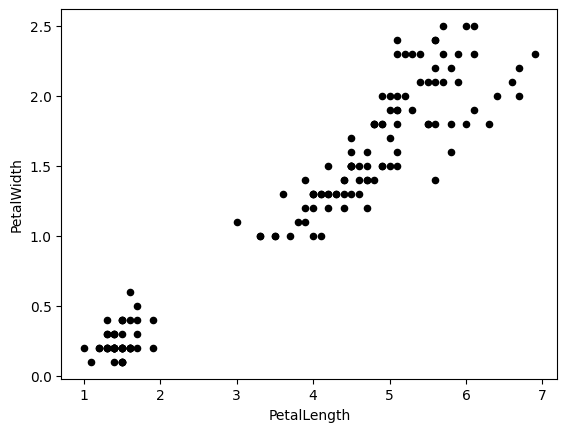

In [2]:
X_train = df_iris[["PetalLength", "PetalWidth"]]

X_train.plot.scatter(x="PetalLength", y="PetalWidth", color = "black");

We can perform hierarchical clustering with scikit-learn `AgglomerativeClustering`. Note that we must specify the `linkage`; we'll try "single" first. (The arguments `distance_threshold=0` and `n_clusters=None` signify to compute the entire dendrogram.) We'll first implement the algorithm without standardizing the features.

In [3]:
from sklearn.cluster import AgglomerativeClustering

hc_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single")

hc_single.fit(X_train)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

We can use `dendrogram` from `scipy.cluster.hierarchy` to plot the dedrogram. However, `dendrogram` expects a so-called "linkage-matrix representation" of the clustering, which is not provided by `AgglomerativeClustering`, but can be computed. We'll use the function `compute_linkage` in the `ISLP.cluster` package to do so, but we need to install the `ISLP` package first. (Here is some [alternative code](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html) for defining a plot_dendrogram function.)

In [ ]:
# !pip install ISLP

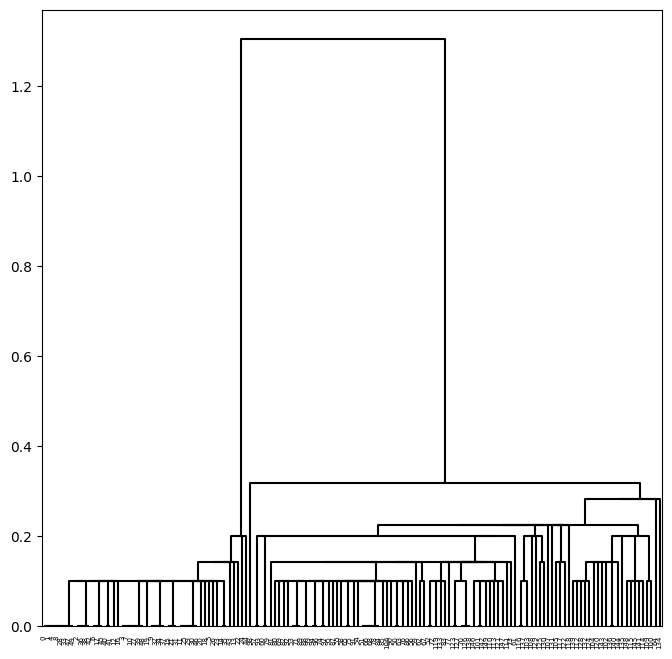

In [4]:
from scipy.cluster.hierarchy import dendrogram
from ISLP.cluster import compute_linkage
import matplotlib.pyplot as plt

linkage_single = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=-np.inf,
           above_threshold_color='black');

Take a minute to interpret the dendrogram, starting from bottom. Each "leaf" at the bottom represents a single observation. As we move up the tree, some leaves fuse into branches. As we move higher up the tree, branches themselves fuse, either with leaves or other branches. The earlier (lower in the tree) the fusions occur, the more similar the groups of observations are to each other. On the other hand, observations that fuse later (near the top of the tree) can be quite diferent. For any two observations, we can look for the horizontal segment in the tree where branches containing those two observations are first fused. The height of this fusion, as measured on the vertical axis, indicates how different the two observations are (but measured in terms of the cluster linkage, rather than observation-to-observation distance). Note that it is only the vertical height of the horizontal "fusions" that matters; the way the leaves/branches are ordered from left to right or the length of the horizonal segments is arbitrary and irrelevant.

Suppose we want the cut the dendrogram so that there are two clusters, say at a height of 0.4. We can change the `color_threshold` to color the branches of the dendrogram to visualize the resulting clusters.

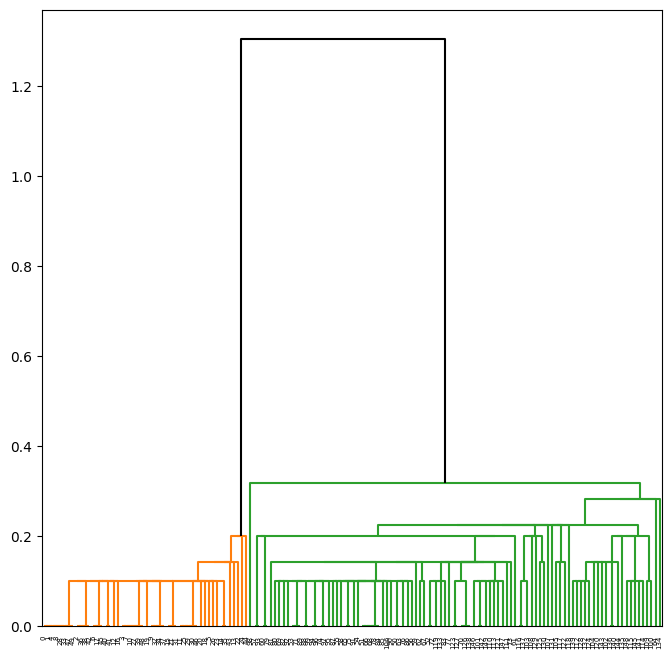

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=0.4,
           above_threshold_color='black');

Now we can see the two clusters in the dendrogram. We can use `cut_tree` from `scipy.cluster.hierarchy` to get the cluster assignments. (The `.T[0]` code below is a technical detail to turn the output of `cut_tree` into an array more compatible with a Pandas series.)

In [6]:

from scipy.cluster.hierarchy import cut_tree

cut_tree(linkage_single, height = 0.4).T[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Instead of a cut height, we can input the number of clusters into `cut_tree` to get the cluster assignments for a given $k$ (the clusters will be labeled 0, 1, $\ldots$, $k-1$.)

Note: the cluster assignments for a given $k$ can also be obtained by providing an argument `n_clusters` to `AgglomerativeClustering`; however, then each cut would require recomputing the clustering.

In [7]:
clusters_ = cut_tree(linkage_single, n_clusters=2).T[0]

clusters_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Here is the scatterplot of the data colored by the cluster assignments. Visually the algorithm seems to have produced two reasonable clusters.

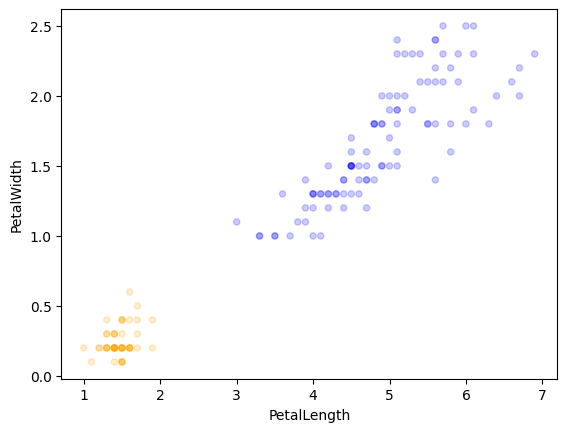

In [8]:
# Map the cluster numbers to colors.
clusters = pd.Series(clusters_).map({
    0: "orange",
    1: "blue"
})

# Plot the current cluster assignments
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2);

## A different value of $k$

The dendrogram provides a map of all possible clusters. To obtain a different number of clusters, we simply need to cut the dendrogram at a different height. Before proceeding, take a look at the dendrogram from above and think about the following questions: if we choose $k=3$ what will the clusters be? If we cut the dendrogram at a height of 0.25, how many clusters will there be? Pause to answer these questions before running the code below.

The code below represents the dendrogram cut so that there are three clusters. It is very similar to the dendrogram cut to two clusters, but pay close attention to the black leaf that represents a cluster with a single observation.

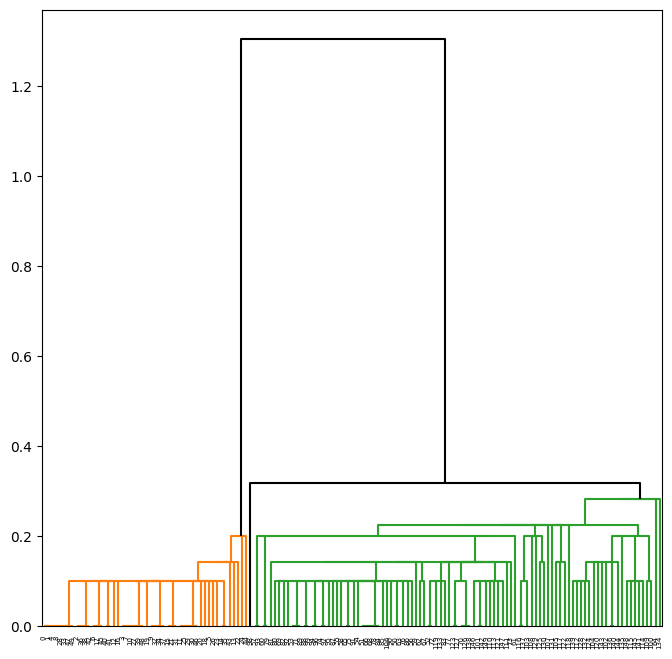

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=0.3,
           above_threshold_color='black');

Here is the corresponding scatterplot. In this case, moving from 2 to 3 clusters only affects a single observation.

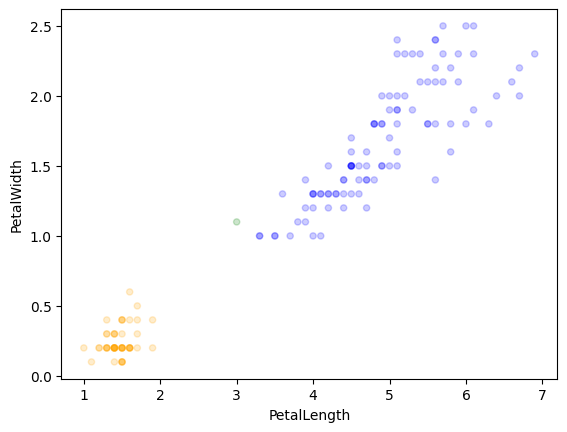

In [10]:
clusters_ = cut_tree(linkage_single, n_clusters=3).T[0]

clusters = pd.Series(clusters_).map({
    0: "orange",
    1: "blue",
    2: "green"
})

# Plot the current cluster assignments
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2);

Cutting the dendrogram at a height of 0.25 results in 5 clusters, 2 large clusters and 3 singletons.

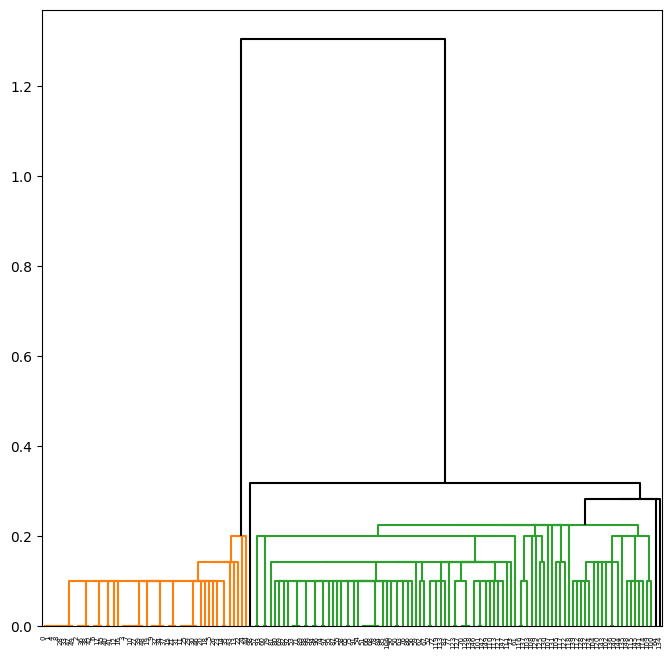

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=0.25,
           above_threshold_color='black');

In [12]:
import plotly.express as px

X_train_plot = X_train.copy()
X_train_plot["clusters"] = cut_tree(linkage_single, height=0.25).T[0].astype(str)

px.scatter(X_train_plot,
           x="PetalLength", y="PetalWidth",
           color = "clusters")


In this example, going beyond $k=2$ clusters results in two large clusters with additional clusters containing few observations, or even just a single observation. Based on the scatterplot and the dendrogram, $k=2$ appears to be the best choice (at least based on single linkage with unstandardized features; we'll revisit these choices below).

But what about species; aren't there 3 species? Recall that $k$-means clustering with $k=3$ applied to these two features seemed to recover species pretty well. The same is not true for hierarchical clustering. Does that mean that $k$-means is necessarily better in this case? No! Remember, this is *unsupervised* learning. If the goal were to predict species, then that would be a supervised learning problem, and we would instead run classification algorithms with species included in our training data. The goal of clustering is to group similar observations based on features, and our hierarchical clustering algorithm with $k=2$ has done that pretty well for these two features. In fact, compared to $k$-means with $k=2$ (recall previous notebook), the hierarchical clustering seems to do an even better job of creating two non-overlapping clusters.

## A different linkage

In general, the shape of the dendrogram and the resulting clusters depend heavily on the linkage used. Now let's try clustering the iris data using complete linkage.

In [13]:
hc_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")

hc_complete.fit(X_train)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

The dendrogram below based on complete linkage looks quite different than that based on single linkage. Keep in mind that the left to right ordering of clusters is arbitrary and irrelevant. Instead, pay attention to the heights where the fusions occur. Not only does complete linkage represent a different scale (about 0 to 6 rather than about 0 to 1.2), the dendrogram has a much different shape.

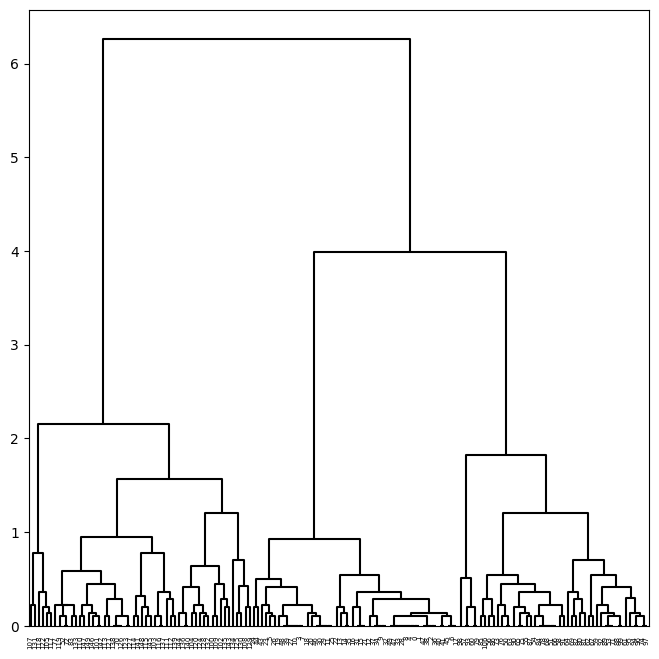

In [14]:
linkage_complete = compute_linkage(hc_complete)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_complete,
           ax=ax,
           color_threshold=-np.inf,
           above_threshold_color='black');

With single linkage, cutting at two clusters resulted in one cluster that had many more observations than the other. With complete linkage, the two clusters are more similar in size.

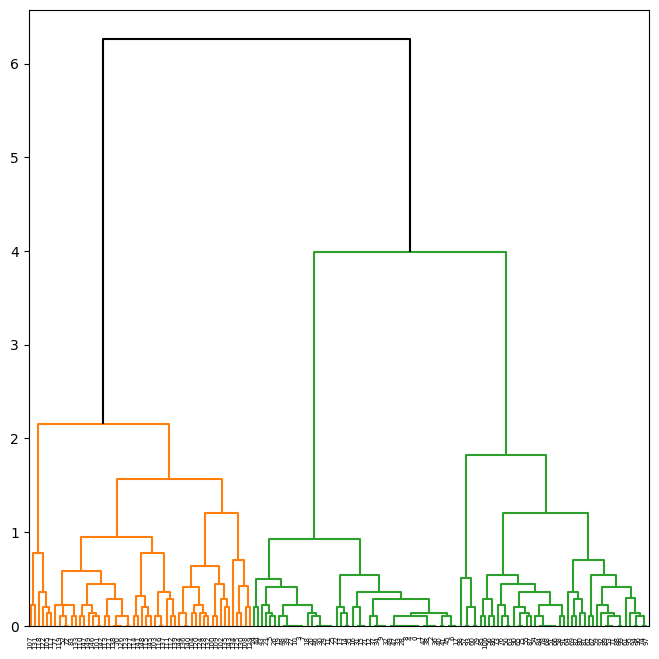

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_complete,
           ax=ax,
           color_threshold=5,
           above_threshold_color='black');

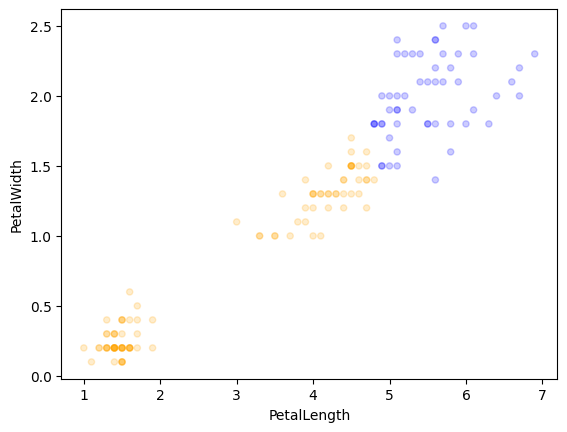

In [16]:
clusters = pd.Series(cut_tree(linkage_complete, n_clusters=2).T[0]).map({
    0: "orange",
    1: "blue"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2);

The difference between single linkage and complete linkage is even starker when we cut the dendrograms to 3 clusters.

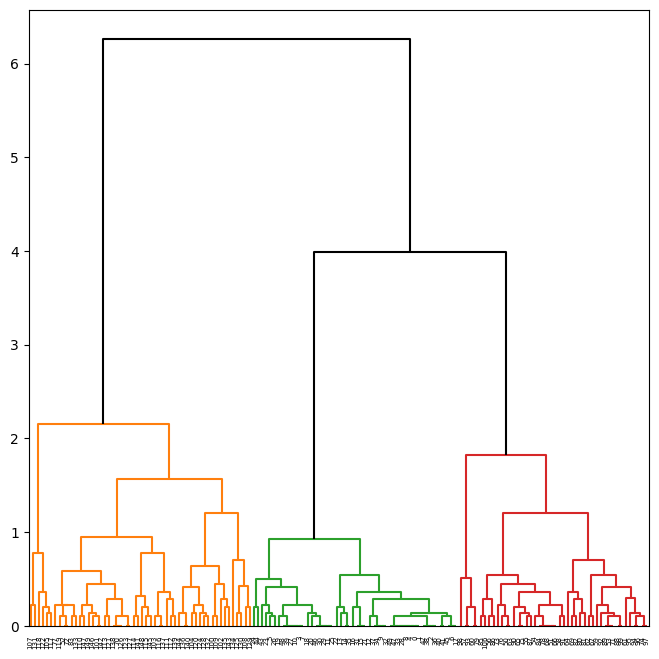

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_complete,
           ax=ax,
           color_threshold=3.5,
           above_threshold_color='black');

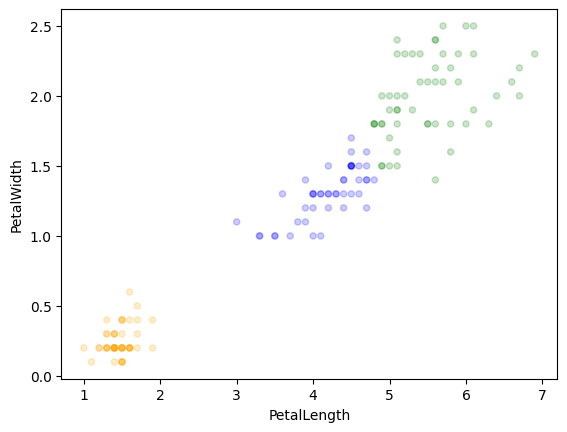

In [18]:
clusters = pd.Series(cut_tree(linkage_complete, n_clusters=3).T[0]).map({
    0: "orange",
    1: "blue",
    2: "green"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2);

The results for hierarchical clustering with complete linkage and 3 clusters are much more similar to those for $k$-means clustering with $k=3$ than to those for hierarchical clustering with single linkage and 3 clusters.

## Standardizing features

In general, the dendrogram and the clustering can also depend heavily on whether the features are scaled. However, for the iris data the results of the different clusterings are fairly similar whether or not the features were scaled, because the two feature variables are on somewhat similar scales.

Here is the dendrogram based on single linkage with scaled features; compare to that with unscaled features from earlier in the notebook.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(X_train)

hc_single_scale = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single")
hc_single_scale.fit(X_scale)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

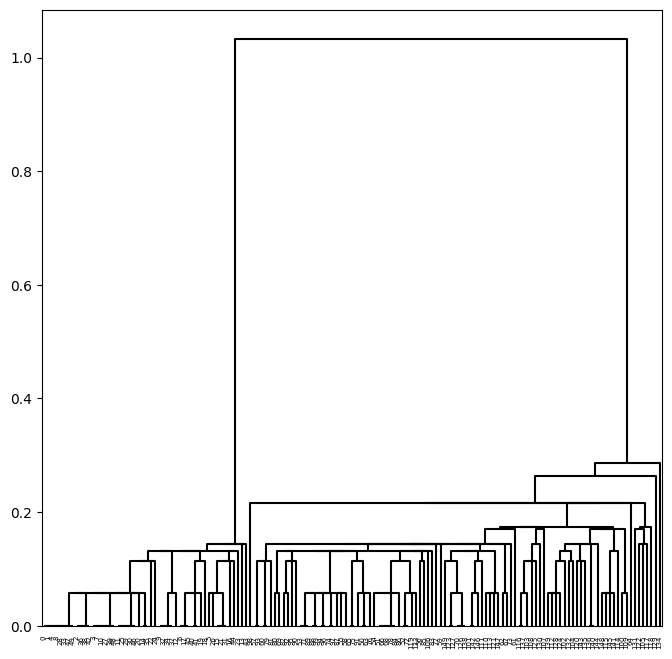

In [20]:
linkage_single_scale = compute_linkage(hc_single_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single_scale,
           ax=ax,
           color_threshold=-np.inf,
           above_threshold_color='black');

And here is the scatterplot of the cluster assignments when the dendrogram is cut to two clusters. For ease of comparison, the features have not been scaled in the scatterplot, even though the clustering is based on scaled features.

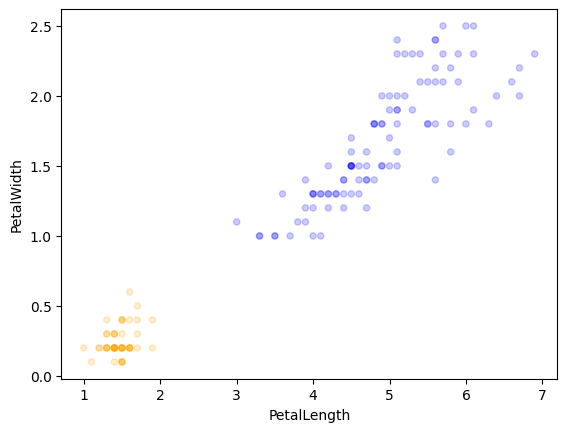

In [21]:
clusters = pd.Series(cut_tree(linkage_single_scale, n_clusters=2).T[0]).map({
    0: "orange",
    1: "blue"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2);

And now clustering with complete linkage and scaled features.

In [22]:
hc_complete_scale = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")
hc_complete_scale.fit(X_scale)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

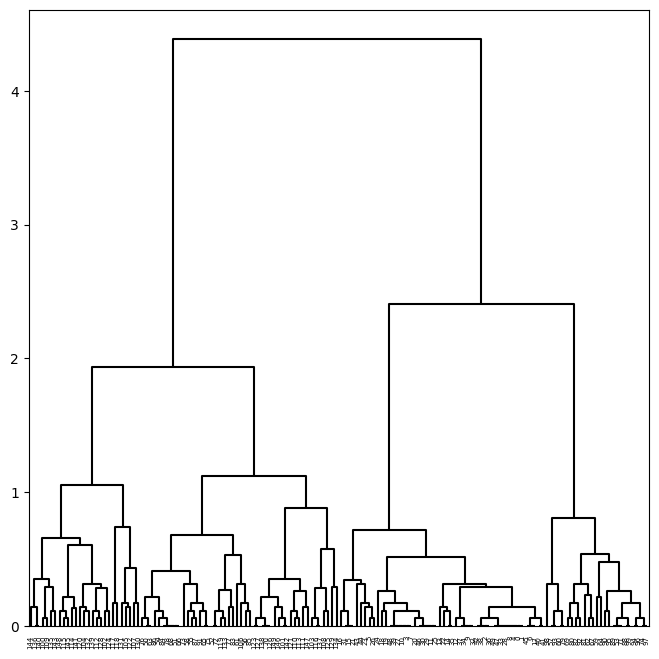

In [23]:
linkage_complete_scale = compute_linkage(hc_complete_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_complete_scale,
           ax=ax,
           color_threshold=-np.inf,
           above_threshold_color='black');

And a visual of the cluster assignments when the complete linkage dendrogram is cut to 3 clusters. While the general shape is similar, the "middle" cluster contains fewer observations when the features are scaled then when they are not.

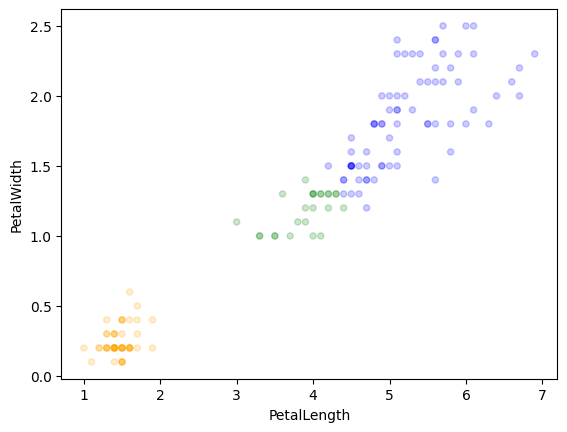

In [24]:
clusters = pd.Series(cut_tree(linkage_complete_scale, n_clusters=3).T[0]).map({
    0: "orange",
    1: "blue",
    2: "green"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2);

## Considerations

There are many choices to make in clustering:

- $k$-means versus hierarchical (or other algorithm)
- similarity/dissimilarity metric (e.g., Euclidean distance, cosine distance)
- number of clusters $k$
- linkage (for hierarchical clustering)

Each of these decisions can have a strong influence on the results obtained. How do we know which choices are "best"? There is no analog of cross-validation for clustering, because we don't have true target labels, so the decision is a little more "subjective". In practice, we try several diferent choices, and look for useful or interpretable results. In particular, what patterns emerge consistently over different choices of parameters? There is no single right answer---any solution that exposes some interesting aspects of the data should be considered. The results of a clustering algorithm should not be taken as the absolute truth about a data set.